
[notice] A new release of pip available: 23.1.1 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


/tmp/ipykernel_685/954096957.py:6: DeprecationWarning: The package qiskit.providers.ibmq is being deprecated. Please see https://ibm.biz/provider_migration_guide to get instructions on how to migrate to qiskit-ibm-provider (https://github.com/Qiskit/qiskit-ibm-provider) and qiskit-ibm-runtime (https://github.com/Qiskit/qiskit-ibm-runtime).
  IBMQ.load_account()
/tmp/ipykernel_685/954096957.py:6: DeprecationWarning: The qiskit.IBMQ entrypoint and the qiskit-ibmq-provider package (accessible from 'qiskit.providers.ibmq`) are deprecated and will be removed in a future release. Instead you should use the qiskit-ibm-provider package which is accessible from 'qiskit_ibm_provider'. You can install it with 'pip install qiskit_ibm_provider'. Just replace 'qiskit.IBMQ' with 'qiskit_ibm_provider.IBMProvider'
  IBMQ.load_account()


Quantum Circuit:
                          ┌─┐
 q_0: ──■────■────■────■──┤M├
      ┌─┴─┐  │  ┌─┴─┐  │  └╥┘
 q_1: ┤ X ├──┼──┤ X ├──┼───╫─
      └───┘┌─┴─┐└───┘┌─┴─┐ ║ 
 q_2: ─────┤ X ├─────┤ X ├─╫─
           └───┘     └───┘ ║ 
c2: 1/═════════════════════╩═
                           0 


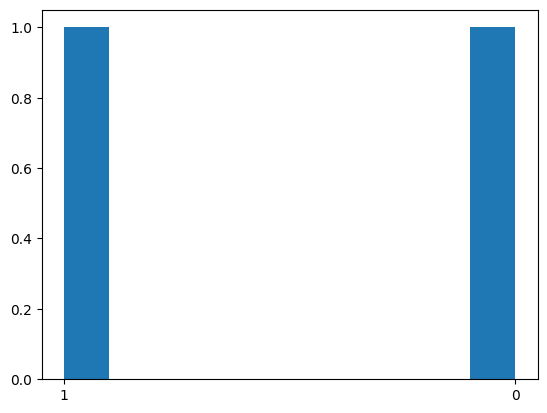

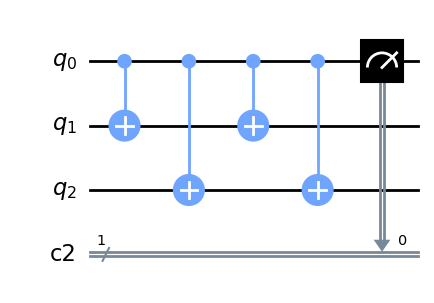

In [1]:
!pip install qiskit
import qiskit
from qiskit import IBMQ

# Load your IBM Quantum account
IBMQ.load_account()

import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile, assemble, execute
from qiskit.visualization import plot_histogram
from qiskit_ibm_runtime import QiskitRuntimeService, Options
from qiskit_ibm_provider import IBMProvider

# Get the provider
provider = IBMQ.get_provider(hub='ibm-q', group='open', project='main')

# Select the 'ibm_nairobi' device
nairobi = provider.get_backend('ibm_nairobi')

# Number of times to repeat the circuit
n = 20000

q = QuantumRegister(3, 'q')
c2 = ClassicalRegister(1, 'c2')

# Define the circuit
bit_flip = QuantumCircuit(q,c2)

# Encodes the qubit in a three-qubit entangled state  
bit_flip.cx(q[0], q[1])
bit_flip.cx(q[0], q[2])

# Decodes the qubit from the three-qubit entangled state  
bit_flip.cx(q[0], q[1])
bit_flip.cx(q[0], q[2])

# Check the state of the initial qubit
bit_flip.measure(q[0], c2[0])

# Print the quantum circuit
print("Quantum Circuit:")
print(bit_flip)

# Compile the circuit
compiled_circuit = transpile(bit_flip, nairobi)
        
# Execute the circuit on the IBM Quantum device
job = execute(bit_flip, nairobi, shots=n)

# Get the result
result = job.result()

# Get the counts for '00' and '11' outcomes
counts = result.get_counts()

# Plot the histogram
plt.hist(counts)

plt.show()

# Draw
bit_flip.draw(output='mpl')